# Kernal PCA

### Data preprocessing

In [1]:
# Import the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[, 3:5]

In [2]:
head(dataset, 10)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0
27,84000,0
32,150000,1
25,33000,0
35,65000,0


In [3]:
# Splitting the dataset into the Training set and Test set
library(caTools)
set.seed(42)
split = sample.split(dataset$Purchased, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
3,26,43000,0
5,19,76000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
9,25,33000,0
10,35,65000,0
11,26,80000,0
12,26,52000,0
13,20,86000,0


In [5]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
1,19,19000,0
2,35,20000,0
4,27,57000,0
14,32,18000,0
22,47,49000,1
25,46,23000,1
27,49,28000,1
28,47,30000,1
29,29,43000,0
30,31,18000,0


In [6]:
# Feature Scaling
training_set[, 1:2] = scale(training_set[, 1:2])
test_set[, 1:2] = scale(test_set[, 1:2])

In [7]:
head(training_set, 10)

,Age,EstimatedSalary,Purchased
3,-1.1066818,-0.8376594,0
5,-1.8012650,0.1400883,0
6,-1.0074557,-0.3932286,0
7,-1.0074557,0.3771180,0
8,-0.5113248,2.3326133,1
9,-1.2059080,-1.1339465,0
10,-0.2136463,-0.1858276,0
11,-1.1066818,0.2586031,0
12,-1.1066818,-0.5710009,0
13,-1.7020388,0.4363754,0


In [8]:
head(test_set, 10)

,Age,EstimatedSalary,Purchased
1,-1.7475734,-1.2751466,0
2,-0.3943405,-1.2465719,0
4,-1.0709570,-0.1893075,0
14,-0.6480717,-1.3037213,0
22,0.6205841,-0.4179052,1
25,0.5360071,-1.1608477,1
27,0.7897383,-1.0179742,1
28,0.6205841,-0.9608247,1
29,-0.9018028,-0.5893535,0
30,-0.7326487,-1.3037213,0


### Applying Kernal PCA

In [9]:
library(kernlab)

In [10]:
kpca = kpca(x = ~., data = training_set[-3], kernel = 'rbfdot', features = 2)

In [11]:
training_set_pca = as.data.frame(predict(kpca, training_set))
training_set_pca$Purchased = training_set$Purchased

In [12]:
test_set_pca = as.data.frame(predict(kpca, test_set))
test_set_pca$Purchased = test_set$Purchased

In [13]:
head(training_set_pca, 10)

,V1,V2,Purchased
3,-8.869673,-1.128312362,0
5,-6.907734,-7.511636369,0
6,-7.058277,-2.802851617,0
7,-3.410552,-6.542107194,0
8,7.021375,-10.011875996,1
9,-9.748163,-0.300243588,0
10,-2.381752,0.004055115,0
11,-4.424377,-6.339104076,0
12,-8.057908,-2.363051178,0
13,-5.377327,-8.429775127,0


In [14]:
head(test_set_pca, 10)

,V1,V2,Purchased
1,-10.5667268,-1.769418,0
2,-7.1977877,4.070540,0
4,-6.4308765,-4.071469,0
14,-8.3377487,2.979923,0
22,1.1895963,5.591956,1
25,-2.2643539,8.325985,1
27,-0.4307589,8.888666,1
28,-1.1183912,8.005006,1
29,-7.4115184,-1.365197,0
30,-8.6436590,2.557534,0


### Fitting Logistic Regreession to the Training set

In [15]:
classifier = glm(formula = Purchased ~ .,
                family = binomial,
                data = training_set_pca)

### Predicting the Test set results

In [16]:
prob_pred = predict(classifier, 
                    type = 'response', 
                    newdata = test_set_pca[-3])

In [17]:
head(prob_pred, 10)

1           2           4          14          22          25 
0.002105457 0.017376296 0.010168894 0.009391789 0.461624515 0.199769497 
         27          28          29          30 
0.374190957 0.286022573 0.008842954 0.007846343

In [18]:
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [19]:
head(y_pred, 10)

1  2  4 14 22 25 27 28 29 30 
 0  0  0  0  0  0  0  0  0  0

### Making the Confusion Matrix

In [20]:
cm = table(test_set_pca[, 3], y_pred)

In [21]:
cm

   y_pred
     0  1
  0 47  4
  1 10 19

* * *

**classifier made 47 + 19 = 66 correct prediction and 10 + 4 = 14 incoreect predictions.**

* * *

### Visualizing the Training set results

In [22]:
# install.packages('ElemStatLearn')
library(ElemStatLearn)

In [23]:
set = training_set_pca

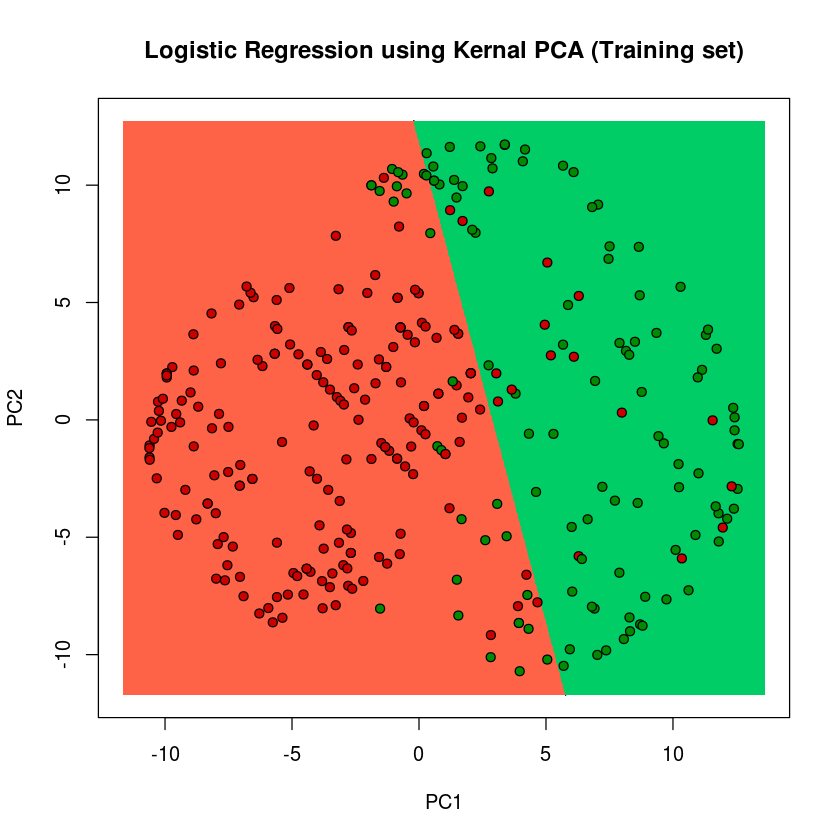

In [24]:
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.025)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.025)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression using Kernal PCA (Training set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

### Visualizing the Test set results

In [25]:
set = test_set_pca

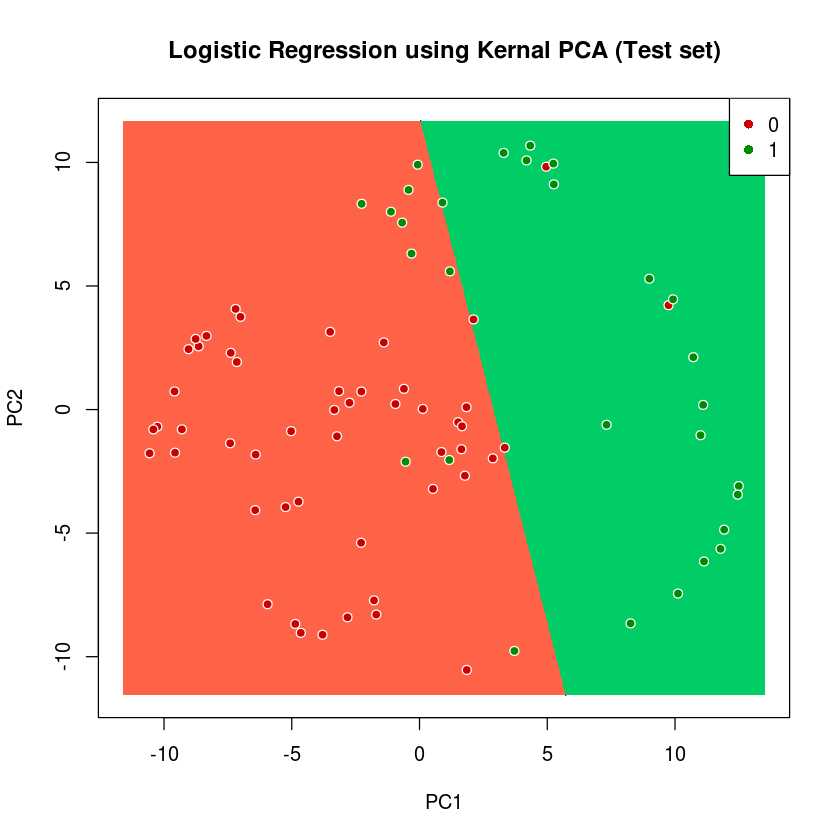

In [26]:
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.025)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.025)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression using Kernal PCA (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'), col='white')
legend("topright", legend = c("0", "1"), pch = 16, col = c('red3', 'green4'))